# Joint PDFs

In [4]:
# imports
import os
import xarray

import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

import pandas

# Load up

In [85]:
data_path = '/home/xavier/Projects/Oceanography/Spray/CUGN'
datafile = 'CUGN_potential_line_90.nc'
ds = xarray.load_dataset(os.path.join(data_path, datafile))

# PDF me

In [8]:
gd_ss = np.isfinite(ds.SA) & np.isfinite(ds.sigma0)

In [10]:
gd_ss.shape

(50, 54842)

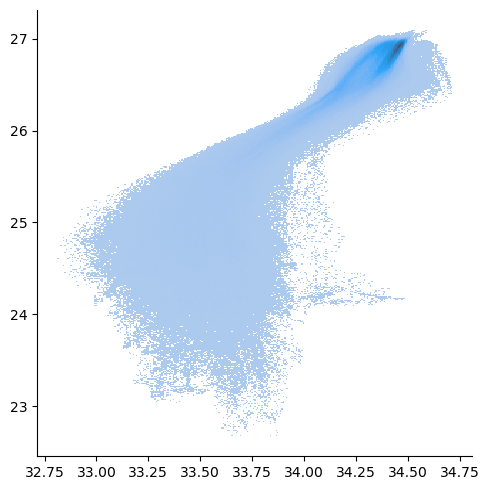

In [17]:
sns.displot(x=ds.SA.data[gd_ss], y=ds.sigma0.data[gd_ss])

Text(37.597222222222214, 0.5, 'Potential Density (kg/m^3)')

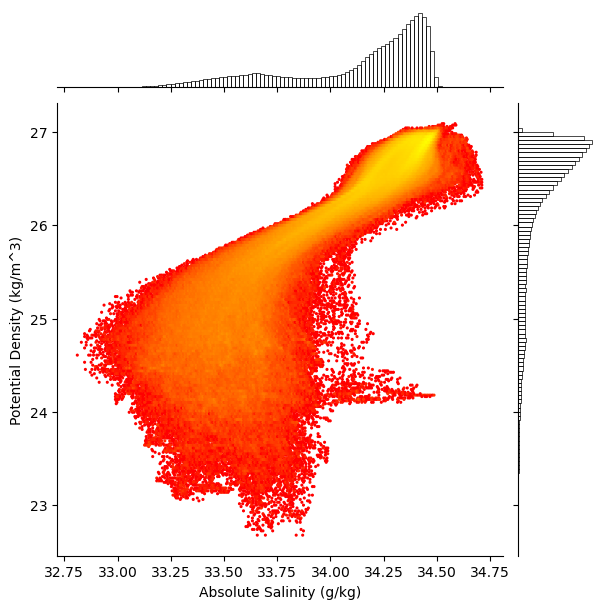

In [22]:
jg = sns.jointplot(x=ds.SA.data[gd_ss], y=ds.sigma0.data[gd_ss], #x='DT', y='LL', 
                   kind='hex',
               bins='log', gridsize=250, #xscale='log',
               cmap=plt.get_cmap('autumn'), mincnt=1,
               marginal_kws=dict(fill=False, color='black', 
                                 bins=100)) 
jg.ax_joint.set_xlabel(r'Absolute Salinity (g/kg)')
jg.ax_joint.set_ylabel(r'Potential Density (kg/m^3)')
#plt.colorbar()

In [67]:
gd_st = np.isfinite(ds.SA) & np.isfinite(ds.CT)

Text(37.597222222222214, 0.5, 'Conservative Temperature (C)')

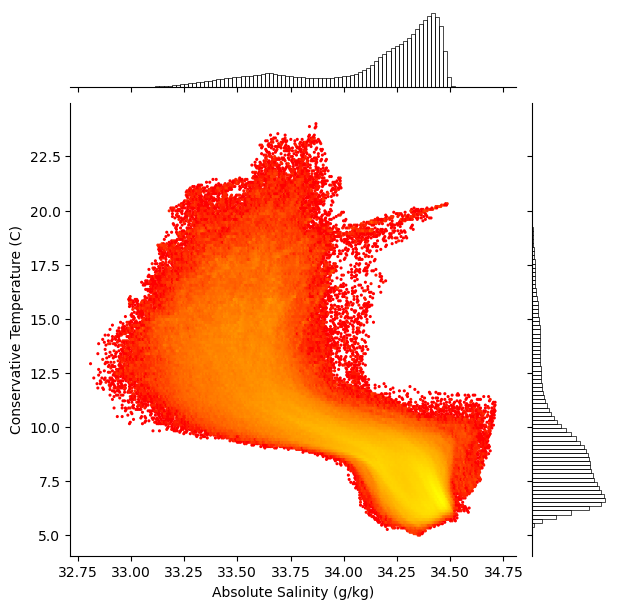

In [68]:
jg = sns.jointplot(x=ds.SA.data[gd_st], y=ds.CT.data[gd_st], #x='DT', y='LL', 
                   kind='hex',
               bins='log', gridsize=250, #xscale='log',
               cmap=plt.get_cmap('autumn'), mincnt=1,
               marginal_kws=dict(fill=False, color='black', 
                                 bins=100)) 
jg.ax_joint.set_xlabel(r'Absolute Salinity (g/kg)')
jg.ax_joint.set_ylabel(r'Conservative Temperature (C)')

# Oxygen and Salinity

In [19]:
gd_so = np.isfinite(ds.SA) & np.isfinite(ds.doxy)

Text(37.597222222222214, 0.5, 'Dissolved Oxygen')

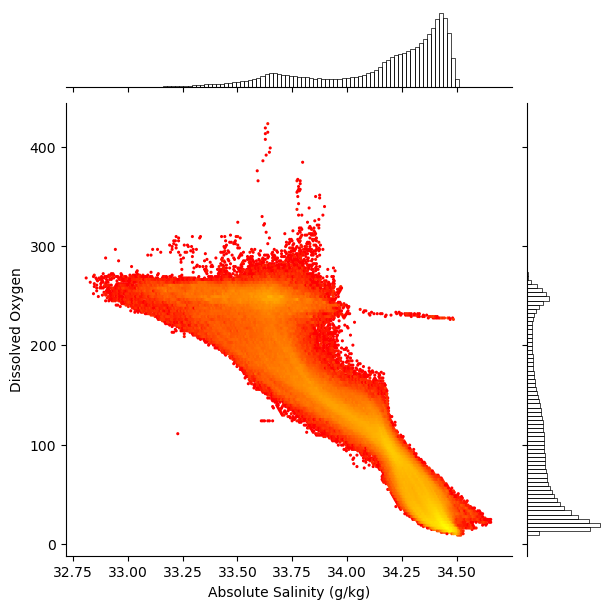

In [23]:
jg = sns.jointplot(x=ds.SA.data[gd_ss], y=ds.doxy.data[gd_ss], #x='DT', y='LL', 
                   kind='hex',
               bins='log', gridsize=250, #xscale='log',
               cmap=plt.get_cmap('autumn'), mincnt=1,
               marginal_kws=dict(fill=False, color='black', 
                                 bins=100)) 
jg.ax_joint.set_xlabel(r'Absolute Salinity (g/kg)')
jg.ax_joint.set_ylabel(r'Dissolved Oxygen')

# PDF at $\theta$, AS

In [25]:
SA_cut = np.abs(ds.SA - 33.5) < 0.1
theta_cut = np.abs(ds.sigma0 - 24.5) < 0.1

In [27]:
all_gd = gd_so & gd_ss & SA_cut & theta_cut
doxy = ds.doxy.data[all_gd]

In [36]:
doxy.shape

(4830,)

Mean: 248.9410570071258, RMS: 6.279293274975759


<Axes: ylabel='Count'>

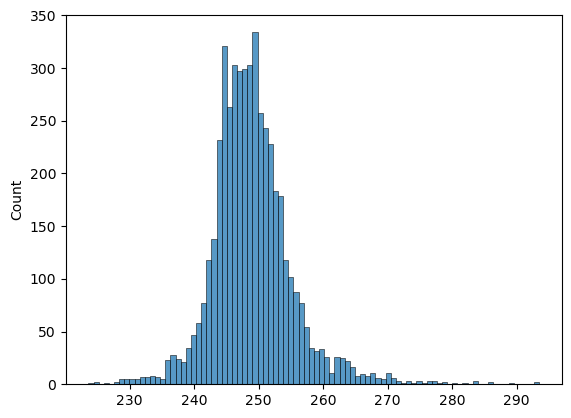

In [29]:
print(f'Mean: {np.mean(doxy)}, RMS: {np.std(doxy)}')
sns.histplot(doxy)

----

# On/off shore

<Axes: ylabel='Count'>

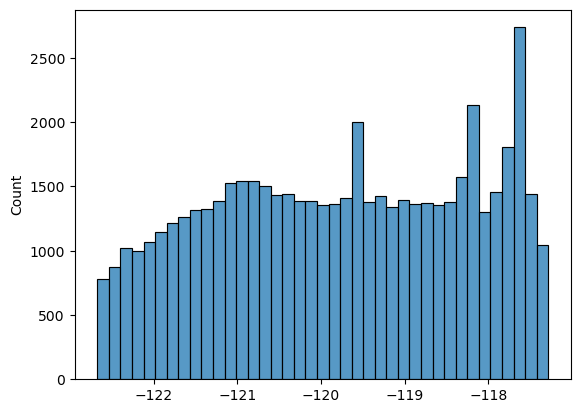

In [33]:
sns.histplot(ds.lon)

In [32]:
lons = np.outer(np.ones(ds.depth.size), ds.lon.data)
lons.shape

(50, 54842)

In [34]:
on = lons > -119.

In [38]:
gd_lons = lons[all_gd]
on = gd_lons > -119.

In [39]:
df = pandas.DataFrame()
df['doxy'] = doxy
#
df['loc'] = 'Offshore'
#
df['loc'].values[on] = 'Onshore'

<Axes: xlabel='doxy', ylabel='Count'>

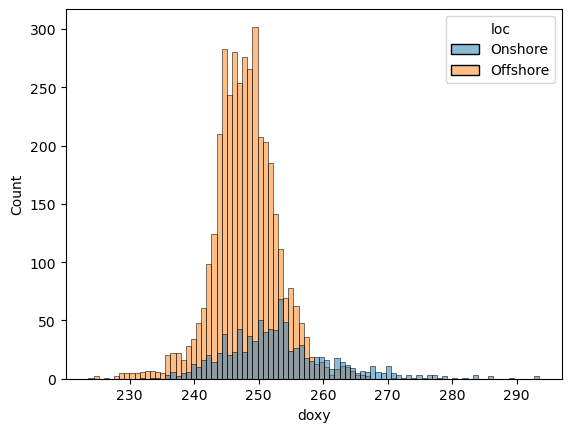

In [40]:
sns.histplot(df, x='doxy', hue='loc')

----

In [86]:
sbins = np.linspace(22.5, 27.2, 50)
Sbins = np.linspace(32.8, 34.8, 50)
CTbins = np.linspace(5, 22.5, 50)

In [87]:
all_f = gd_ss & gd_so

In [88]:
# Values
med_oxy, xedges, yedges, _ =\
            stats.binned_statistic_2d(
                ds.SA.data[all_f], ds.sigma0.data[all_f], 
                ds.doxy.data[all_f],
                'median', # 'std', 
                bins=[Sbins, sbins])

In [89]:
# Counts
counts, _, _ = np.histogram2d(
                ds.SA.data[all_f], ds.sigma0.data[all_f], 
                bins=[Sbins,sbins])

In [90]:
counts.shape, med_oxy.shape

((49, 49), (49, 49))

In [91]:
null = counts < 10.
med_oxy[null] = np.nan

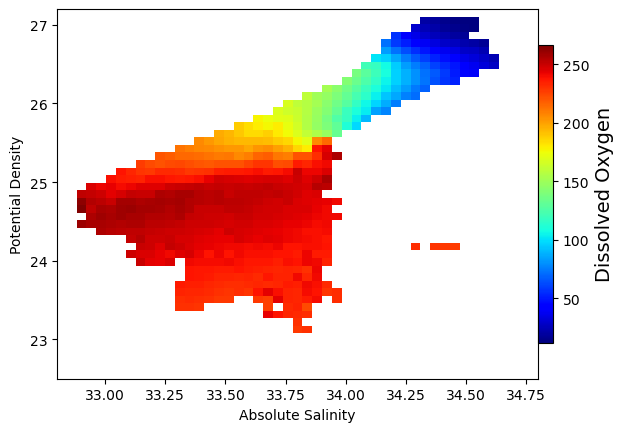

In [92]:
plt.clf()
ax = plt.gca()
#
cmap = 'jet'
img = ax.pcolormesh(xedges, yedges, 
                             med_oxy.T, cmap=cmap) 
# colorbar
cb = plt.colorbar(img, pad=0., fraction=0.030)
cb.set_label('Dissolved Oxygen', fontsize=14.)

#
ax.set_xlabel('Absolute Salinity')
ax.set_ylabel('Potential Density')

plt.show()

## CT and AS

In [70]:
# Values
med_oxy, xedges, yedges, _ =\
            stats.binned_statistic_2d(
                ds.SA.data[all_f], ds.CT.data[all_f], 
                ds.doxy.data[all_f],
                'median', # 'std', 
                bins=[Sbins, CTbins])

In [72]:
counts, _, _ = np.histogram2d(
                ds.SA.data[all_f], ds.CT.data[all_f], 
                bins=[Sbins,CTbins])
null = counts < 10.
med_oxy[null] = np.nan

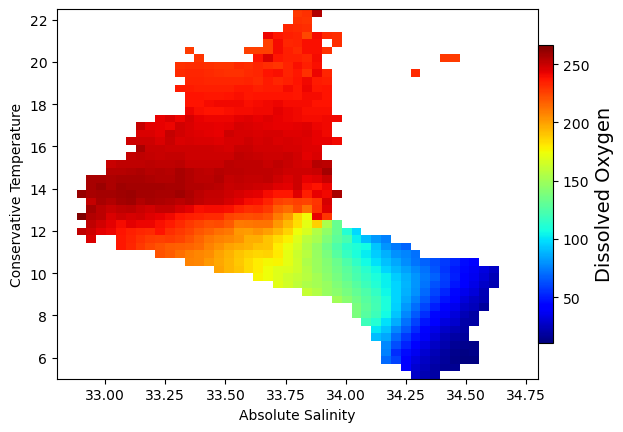

In [73]:
plt.clf()
ax = plt.gca()
#
cmap = 'jet'
img = ax.pcolormesh(xedges, yedges, 
                             med_oxy.T, cmap=cmap) 
# colorbar
cb = plt.colorbar(img, pad=0., fraction=0.030)
cb.set_label('Dissolved Oxygen', fontsize=14.)

#
ax.set_xlabel('Absolute Salinity')
ax.set_ylabel('Conservative Temperature')

plt.show()

## RMS

In [74]:
# RMS
rms_oxy, xedges, yedges, _ =\
            stats.binned_statistic_2d(
                ds.SA.data[all_f], ds.CT.data[all_f], 
                ds.doxy.data[all_f],
                'std', 
                bins=[Sbins, CTbins])

In [75]:
rms_oxy[null] = np.nan

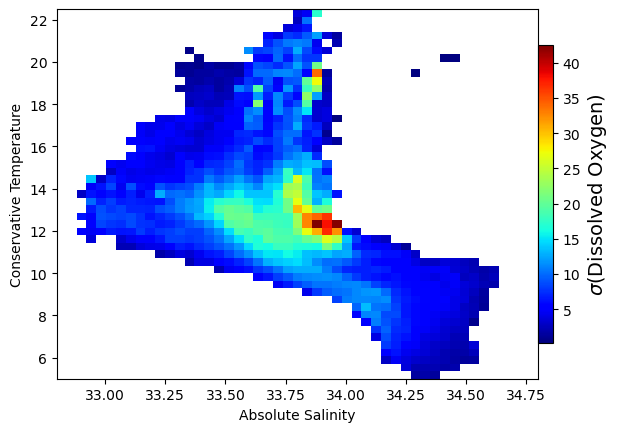

In [76]:
plt.clf()
ax = plt.gca()
#
cmap = 'jet'
img = ax.pcolormesh(xedges, yedges, 
                             rms_oxy.T, cmap=cmap) 
# colorbar
cb = plt.colorbar(img, pad=0., fraction=0.030)
cb.set_label(r'$\sigma($Dissolved Oxygen)', fontsize=14.)

#
ax.set_xlabel('Absolute Salinity')
ax.set_ylabel('Conservative Temperature')

plt.show()

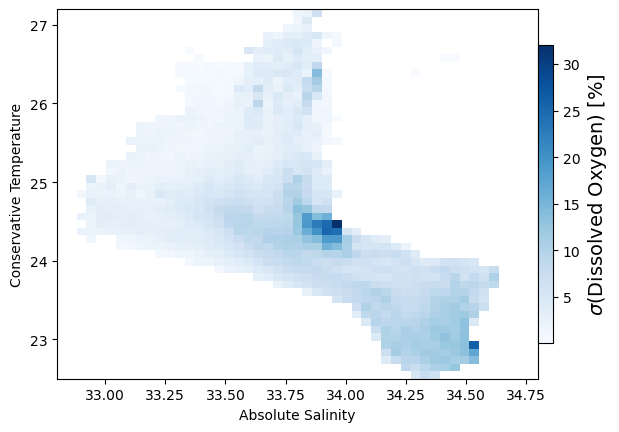

In [81]:
# Percentile
plt.clf()
ax = plt.gca()
#
cmap = 'Blues'
img = ax.pcolormesh(xedges, yedges, 
                             100*rms_oxy.T/med_oxy.T, cmap=cmap) 
# colorbar
cb = plt.colorbar(img, pad=0., fraction=0.030)
cb.set_label(r'$\sigma($Dissolved Oxygen) [%]', fontsize=14.)

#
ax.set_xlabel('Absolute Salinity')
ax.set_ylabel('Conservative Temperature')

plt.show()

In [80]:
# RMS
rms_oxy2, xedges, yedges, _ =\
            stats.binned_statistic_2d(
                ds.SA.data[all_f], ds.sigma0.data[all_f], 
                ds.doxy.data[all_f],
                'std', 
                bins=[Sbins, sbins])

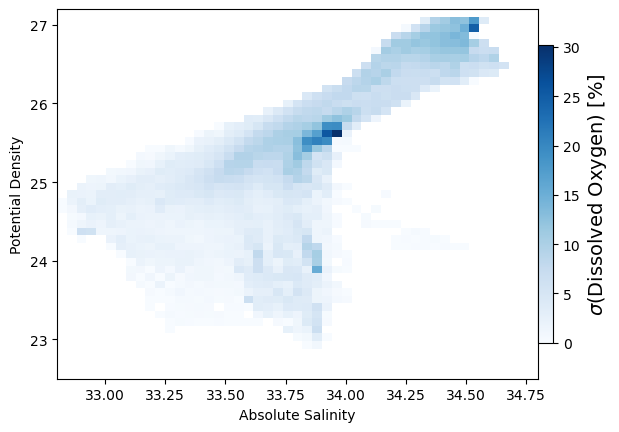

In [84]:
# Percentile
plt.clf()
ax = plt.gca()
#
cmap = 'Blues'
img = ax.pcolormesh(xedges, yedges, 
                             100*rms_oxy2.T/med_oxy.T, cmap=cmap) 
# colorbar
cb = plt.colorbar(img, pad=0., fraction=0.030)
cb.set_label(r'$\sigma($Dissolved Oxygen) [%]', fontsize=14.)

#
ax.set_xlabel('Absolute Salinity')
ax.set_ylabel('Potential Density')

plt.show()

----

# Next steps

## ESPER comparison -- Larissa Dias (PML)

## Annual cycle

## Predict Line 56 -- Same place

In [ ]:
## 